In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn as mg

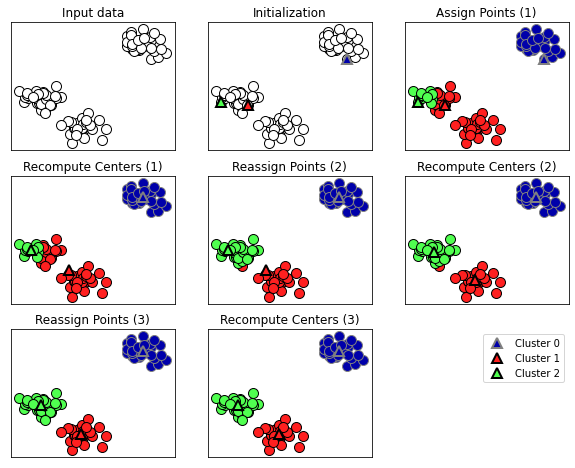

In [3]:
mg.plots.plot_kmeans_algorithm()

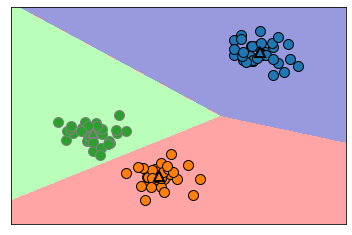

In [6]:
mg.plots.plot_kmeans_boundaries()

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [9]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


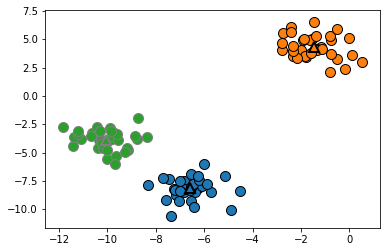

In [10]:
mg.discrete_scatter(X[:,0], X[:, 1], kmeans.labels_, markers='o')
mg.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

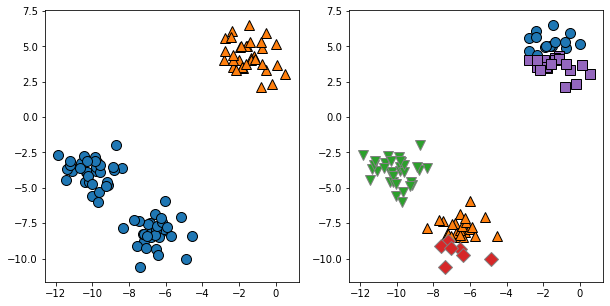

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mg.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mg.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

In [13]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0, 2.5, .5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

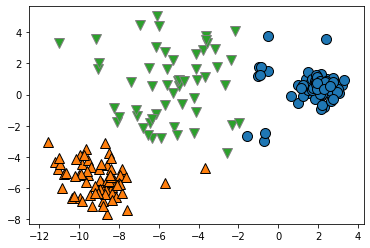

In [14]:
mg.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

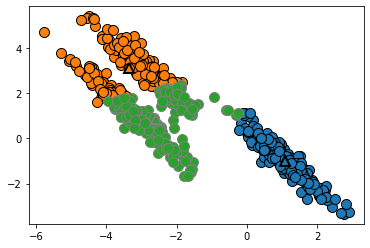

In [16]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mg.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mg.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

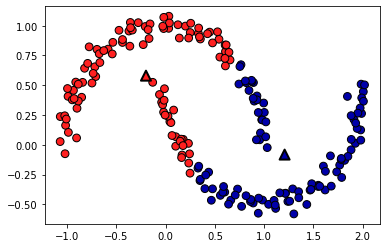

In [18]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mg.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mg.cm2(0), mg.cm2(1)], s=100, linewidth=2, edgecolors='k')

In [19]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
    
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

/tmp/ipykernel_12257/1755542694.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [20]:
from sklearn.decomposition import PCA, NMF

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_pca = pca.inverse_transform(pca.transform(X_test))
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


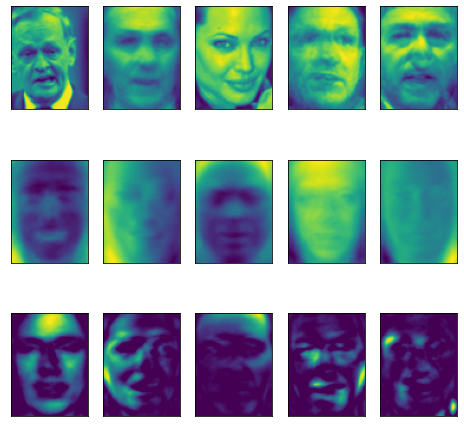

In [25]:
fig, axes =plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})

for ax, comp_kmenas, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmenas.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    

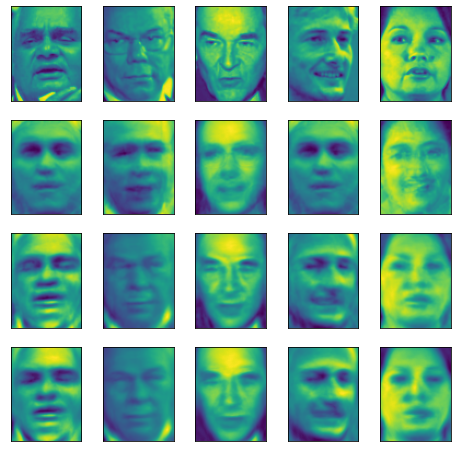

In [27]:
fig, axes =plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_kmeans, X_pca, X_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

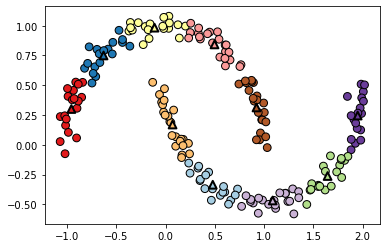

In [29]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')

In [ ]:
plt